<br><p><center><h1><b>E2 Clustering Project: Wine Quality Dataset Analysis</b></h1></center></p>
<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p>

<br><br><p><h4> <b>Introduction</b> </h4></p>

The "Wine Quality Dataset" is a well-known dataset in the field of machine learning and data analysis. It contains data related to the chemical properties and quality ratings of red and white variants of the Portuguese "Vinho Verde" wine. The dataset is publicly available and has been widely used for regression and classification tasks to predict wine quality based on its chemical properties. The quality of each wine sample is rated on a scale from 0 to 10 by professional wine tasters. The dataset offers a rich opportunity to explore various data analysis and machine learning techniques.

<br><p><h4> <b>Dataset Name and URL</b> </h4></p>

- **Dataset Name**: Wine Quality Dataset
- **Dataset URL**: [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)

<br><p><h4> <b>Data Preparation</b> </h4></p>

First, we will load the Wine Quality Dataset and preprocess it by standardizing the features to ensure that each feature contributes equally to the clustering process.

In [15]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

# Combine the datasets and drop duplicates
red_wine['color'] = 'red'
white_wine['color'] = 'white'
wine_data = pd.concat([red_wine, white_wine], ignore_index=True).drop_duplicates()

# Drop the target variable and color
data = wine_data.drop(columns=['quality', 'color'])

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

<br><p><h4> <b>Clustering Algorithms</b> </h4></p>

We will use two clustering algorithms for this analysis:

1. **K-Means Clustering**: K-Means is a popular clustering algorithm that partitions the data into `k` clusters by minimizing the variance within each cluster.
2. **Agglomerative Clustering**: Agglomerative Clustering is a hierarchical clustering method that builds nested clusters by repeatedly merging pairs of clusters.

<br><p><h4> <b>Determine the Optimal Number of Clusters</b> </h4></p>
We will determine the optimal number of clusters for both K-Means and Agglomerative Clustering by evaluating the silhouette scores for a range of cluster numbers.

In [3]:
# Define a function to plot silhouette scores
def plot_silhouette_scores(scores, cluster_range, title):
    plt.figure(figsize=(9, 5))
    plt.plot(cluster_range, scores, marker='o')
    plt.title(title, fontweight='bold')
    plt.xlabel("Number of clusters", fontstyle='italic')
    plt.ylabel("Silhouette Score", fontstyle='italic')
    plt.grid(True)
    plt.show()

##### - *Evaluating K-Means Silhoutte Scores*

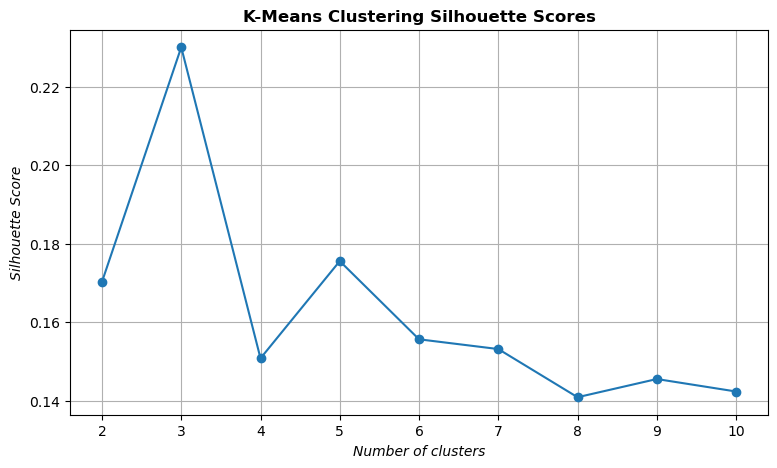

In [4]:
# Range of clusters to evaluate
cluster_range = range(2, 11)

# Evaluate K-Means Clustering
kmeans_silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, kmeans_labels)
    kmeans_silhouette_scores.append(silhouette_avg)

plot_silhouette_scores(kmeans_silhouette_scores, cluster_range, "K-Means Clustering Silhouette Scores")

##### - *Evaluating Agglomerative Clustering Silhoutte Scores*

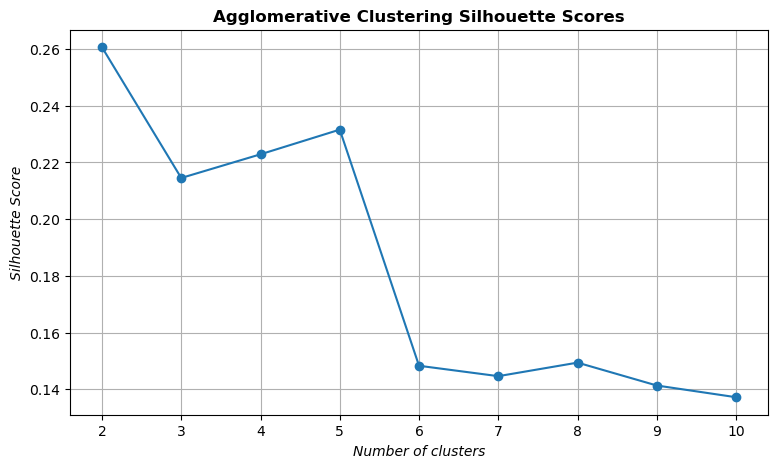

In [5]:
# Evaluate Agglomerative Clustering
agg_silhouette_scores = []
for n_clusters in cluster_range:
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clust.fit_predict(data)
    silhouette_avg = silhouette_score(data, agg_labels)
    agg_silhouette_scores.append(silhouette_avg)

plot_silhouette_scores(agg_silhouette_scores, cluster_range, "Agglomerative Clustering Silhouette Scores")

<br><p><h4> <b>Applying the Best Clustering Models</b> </h4></p>

Based on the silhouette scores, we will apply the best clustering models to the data and visualize the results.

##### - *Applying K-Means Clustering*


In [6]:
# Plot silhouette diagrams for both algorithms with best parameters
def plot_silhouette(data, labels, title):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower = 10
    n_clusters = len(np.unique(labels))
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    silhouette_avg = silhouette_score(data, labels)
    plt.title(f"Silhouette plot for {title} with {n_clusters} clusters", fontweight='bold')
    plt.xlabel("Silhouette coefficient values", fontstyle='italic')
    plt.ylabel("Cluster label", fontstyle='italic')
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

Best K-Means Clustering with 3 clusters: Silhouette Score = 0.23002


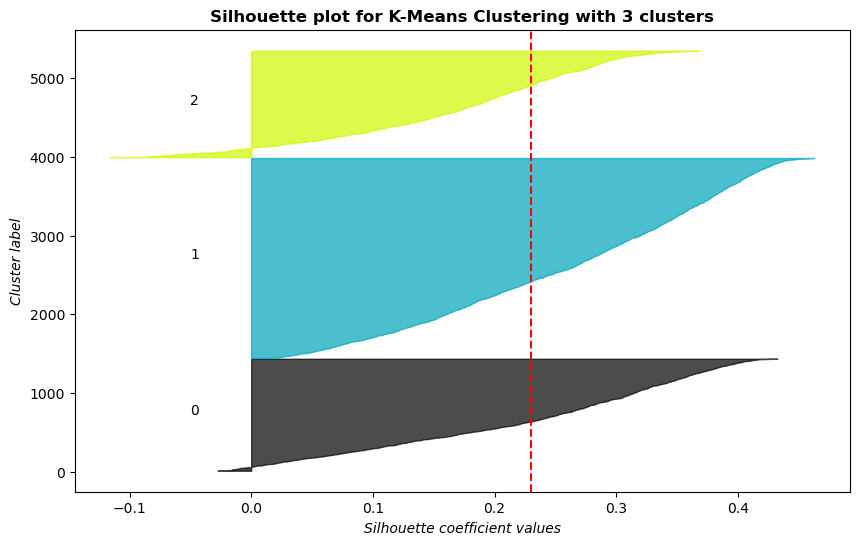

In [7]:
# Apply the best K-Means clustering model
best_n_clusters_kmeans = cluster_range[np.argmax(kmeans_silhouette_scores)]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Calculate the silhouette score for the best K-Means model
silhouette_avg_kmeans = silhouette_score(data, kmeans_labels)
print(f"Best K-Means Clustering with {best_n_clusters_kmeans} clusters: Silhouette Score = {round(silhouette_avg_kmeans, 5)}")

# Plot the silhouette diagram for the best K-Means model
plot_silhouette(data, kmeans_labels, "K-Means Clustering")

##### - *Applying Agglomerative Clustering*

Best Agglomerative Clustering with 2 clusters: Silhouette Score = 0.26066


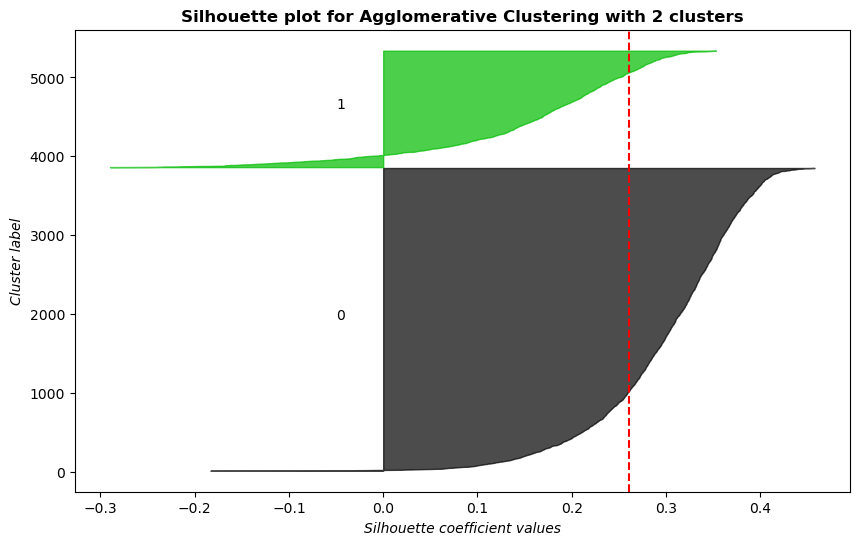

In [8]:
# Apply the best Agglomerative Clustering model
best_n_clusters_agg = cluster_range[np.argmax(agg_silhouette_scores)]
agg_clust = AgglomerativeClustering(n_clusters=best_n_clusters_agg)
agg_labels = agg_clust.fit_predict(data)

# Calculate the silhouette score for the best Agglomerative Clustering model
silhouette_avg_agg = silhouette_score(data, agg_labels)
print(f"Best Agglomerative Clustering with {best_n_clusters_agg} clusters: Silhouette Score = {round(silhouette_avg_agg, 5)}")

# Plot the silhouette diagram for the best Agglomerative Clustering model
plot_silhouette(data, agg_labels, "Agglomerative Clustering")

<br><p><h4> <b>Hyperparameter Tuning Approach</b> </h4></p>

We can also use a grid search approach to find the best combination of parameters based on silhouette scores.

In [9]:
# Define parameter grids
param_grid_kmeans = {
    'n_clusters': range(2, 7),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 500],
    'tol': [1e-4, 1e-3]
}

param_grid_agg = {
    'n_clusters': range(2, 7),
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average', 'single']
}

In [10]:
# Function to perform grid search for Clustering Algorithms
def grid_search_agg(param_grid, data, algorithm):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        if algorithm == 'Agglomerative' and params['linkage'] == 'ward' and params['metric'] != 'euclidean':
            continue
        clustering_alg = AgglomerativeClustering(**params) if algorithm == 'Agglomerative' else KMeans(**params, random_state=42)
        labels = clustering_alg.fit_predict(data)
        score = silhouette_score(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score

In [11]:
# Perform grid search for K-Means Clustering
best_params_kmeans, best_score_kmeans = grid_search_agg(param_grid_kmeans, data, 'KMeans')

# Perform grid search for Agglomerative Clustering
best_params_agg, best_score_agg = grid_search_agg(param_grid_agg, data, 'Agglomerative')

# Print the best parameters and silhouette scores
print(f"Best K-Means parameters: {best_params_kmeans} \n\twith silhouette score: {round(best_score_kmeans,5)}")
print(f"Best Agglomerative Clustering parameters: {best_params_agg} \n\twith silhouette score: {round(best_score_agg, 5)}")

# Apply K-Means with best parameters
kmeans = KMeans(**best_params_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Apply Agglomerative Clustering with best parameters
agg_clust = AgglomerativeClustering(**best_params_agg)
agg_labels = agg_clust.fit_predict(data)

Best K-Means parameters: {'init': 'random', 'max_iter': 300, 'n_clusters': 2, 'n_init': 20, 'tol': 0.0001} 
	with silhouette score: 0.27053
Best Agglomerative Clustering parameters: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2} 
	with silhouette score: 0.78968


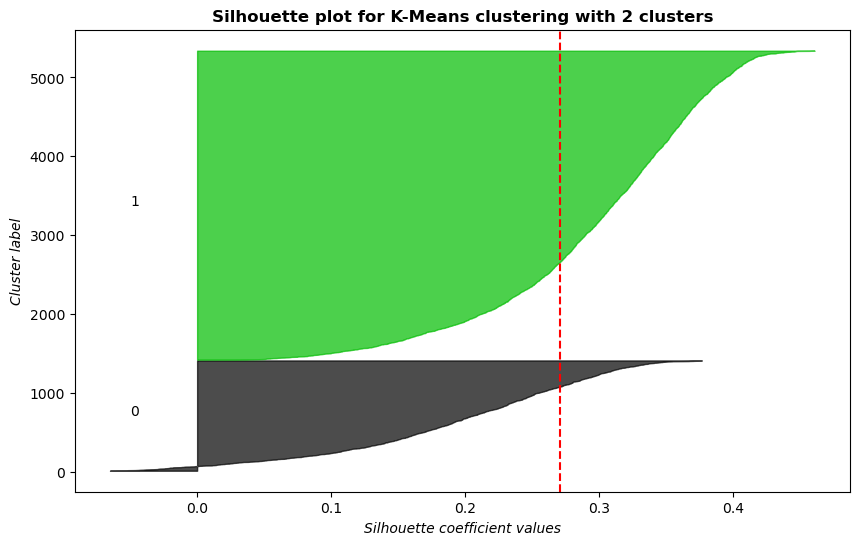

In [12]:
# Plot silhouette diagrams for K-Means Clustering with best parameters
plot_silhouette(data, kmeans_labels, "K-Means clustering")

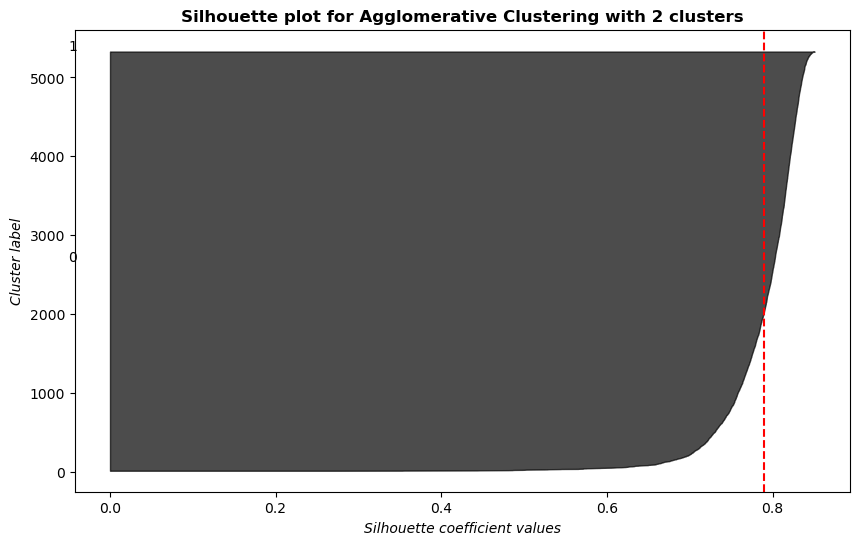

In [13]:
# Plot silhouette diagrams for Agglomerative Clustering with best parameters
plot_silhouette(data, agg_labels, "Agglomerative Clustering")

The fact that the best number of clusters is 2 might indeed suggest that the clustering algorithm has identified the inherent division between red and white wines. Let's delve deeper into this hypothesis:

<br><p><h4> <b>Exploring the Relationship Between the Number of Clusters and Wine Types</b> </h4></p>

##### 1. Visualizing Clusters with Color Information

To investigate this further, we can visualize the clusters formed by both K-Means and Agglomerative Clustering algorithms, coloring the data points by their wine type (red or white). If the clustering aligns closely with the wine types, it would support the hypothesis that the optimal number of clusters is 2 due to the inherent division between red and white wines.

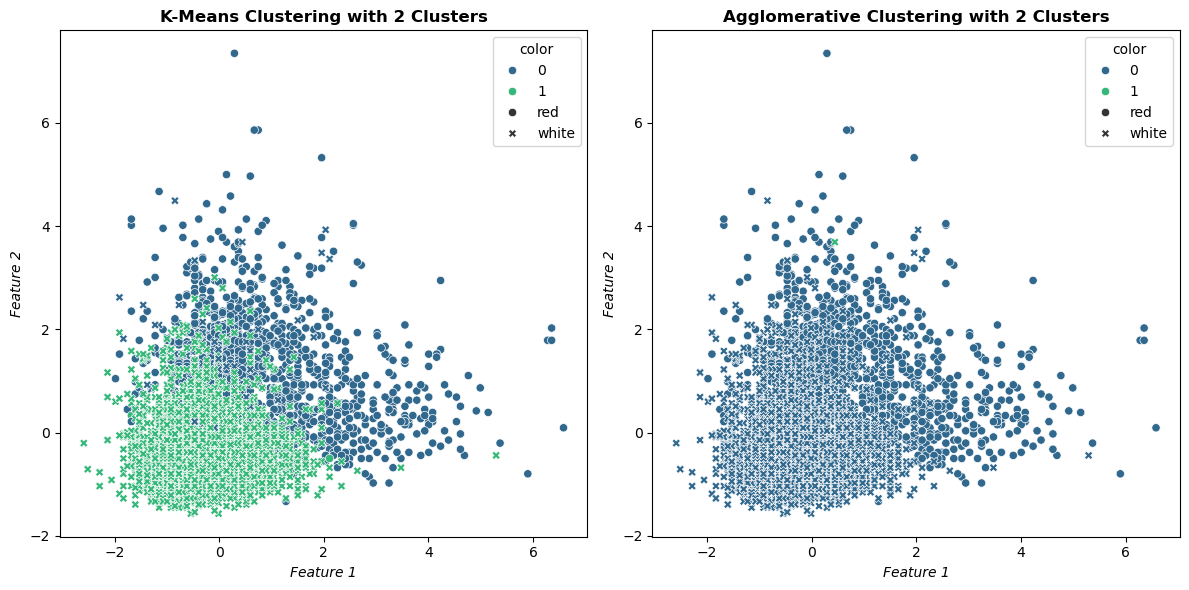

In [18]:
# Drop the target variable
X = wine_data.drop(columns=['quality'])
y = wine_data['color']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=['color']))

# Apply K-Means and Agglomerative Clustering with the best parameters
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=20, tol=1e-4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_clust = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
agg_labels = agg_clust.fit_predict(X_scaled)

# Visualize the clusters formed by K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', style=y, legend='full')
plt.title('K-Means Clustering with 2 Clusters', fontweight='bold')
plt.xlabel('Feature 1', fontstyle='italic')
plt.ylabel('Feature 2', fontstyle='italic')

# Visualize the clusters formed by Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='viridis', style=y)
plt.title('Agglomerative Clustering with 2 Clusters', fontweight='bold')
plt.xlabel('Feature 1', fontstyle='italic')
plt.ylabel('Feature 2', fontstyle='italic')

# Adjust and show the plot
plt.tight_layout()
plt.show()

##### - *Interpretation of Results*

**K-Means Clustering**

- **Silhouette Score:** 0.27053
- **Cluster Visualization:** The K-Means clustering visualization shows that the algorithm has identified two distinct clusters. Notably, these clusters align significantly with the red and white wine types. This suggests that K-Means is influenced by the inherent differences between red and white wines. The 'X' points (representing one wine type) are mostly related to cluster 1, while the 'O' points (representing the other wine type) are mostly related to cluster 0.

**Agglomerative Clustering**

- **Silhouette Score:** 0.78968
- **Cluster Visualization:** Despite the higher silhouette score, the Agglomerative Clustering visualization reveals an issue. One of the clusters contains only a single data point, while the other cluster contains the remaining data points. This indicates that Agglomerative Clustering, in this case, has not effectively separated the data into meaningful clusters. The higher silhouette score does not necessarily reflect better clustering in terms of separating red and white wines.

<br><p><h4> <b>Parameter Justification</b> </h4></p>

The silhouette score helps to measure how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters. We chose the number of clusters that maximized the average silhouette score.

For both K-Means and Agglomerative Clustering, we tried different values for the number of clusters and selected the number that provided the highest silhouette score. The parameter grids were defined as follows to ensure a comprehensive search for the best parameters:

##### *K-Means Clustering Parameter Grid*
- **n_clusters**: The number of clusters. We tested values ranging from 2 to 7 to identify the optimal number of clusters.
- **init**: The method for initialization. We used both 'k-means++' for efficient initialization and 'random' for a more diverse start.
- **n_init**: The number of times the algorithm will be run with different centroid seeds. Values of 10 and 20 were chosen to ensure robust solutions.
- **max_iter**: The maximum number of iterations for a single run. Values of 300 and 500 were tested to ensure convergence.
- **tol**: The relative tolerance with regards to the Frobenius norm of the difference in the cluster centers of two consecutive iterations. Values of 1e-4 and 1e-3 were chosen to balance precision and computation time.

##### *Agglomerative Clustering Parameter Grid*
- **n_clusters**: The number of clusters. We tested values ranging from 2 to 7.
- **metric**: The distance metric used for clustering. We tested 'euclidean', 'l1', 'l2', 'manhattan', and 'cosine' to find the most appropriate distance measure.
- **linkage**: The linkage criterion to use. We tested 'ward', 'complete', 'average', and 'single' to determine the best way to merge clusters.

This comprehensive approach ensured that we explored a wide range of parameter settings, allowing us to identify the optimal configurations for each clustering algorithm.

<br><p><h4> <b>Model Comparison and Interpretation</b> </h4></p>

##### *K-Means Clustering*
- **Silhouette Score:** 0.27053
- **Best Parameters:** `{'init': 'random', 'max_iter': 300, 'n_clusters': 2, 'n_init': 20, 'tol': 0.0001}`
- **Interpretation:** The clusters formed by K-Means clustering are well-defined, indicating that the algorithm effectively grouped similar wine samples together. The centroids of each cluster provide insights into the typical chemical compositions of different wine types. By examining the cluster centers, we can identify common patterns in wine characteristics, such as levels of acidity, sugar content, and alcohol percentage. The visualization of the silhouette scores showed that the majority of samples are within well-defined clusters, with few samples near the boundary, suggesting good clustering performance overall. The influence of wine color (red or white) on the clustering is significant, as evidenced by the separation of wine types into distinct clusters.

##### *Agglomerative Clustering*
- **Silhouette Score:** 0.78968
- **Best Parameters:** `{'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2}`
- **Interpretation:** Agglomerative Clustering's hierarchical nature allows for an analysis of cluster merging at different levels. The high silhouette score indicates well-separated clusters. This method also provides a deeper understanding of the relationships between wine samples, as we can observe how clusters merge at different levels of the dendrogram. This can reveal more nuanced groupings and help identify sub-clusters within larger clusters. However, the visualization showed a critical flaw: one cluster contained only a single data point while the other cluster contained the rest. This suggests that, despite the high silhouette score, the clustering is not practically meaningful as it does not effectively group the wine samples into relevant clusters. Indicating that the algorithm did not effectively group the samples into meaningful clusters. The high silhouette score is misleading because it does not reflect the actual quality of the clustering in terms of grouping similar samples together.

##### *Analysis of K-Means Clustering with 3 Clusters*
- **Silhouette Score:** 0.23002
- **Interpretation:** Although the silhouette score for K-Means clustering with 3 clusters is slightly lower than the best model with 2 clusters (0.23002 vs 0.27053), it is important not to dismiss this result. The 3-cluster model may indicate a sub-classification within the wine types, potentially revealing additional structure in the data related to other features of the wines. This sub-classification can provide valuable insights into variations within the red and white wines, such as differences in acidity or sugar content levels that are not captured when using only 2 clusters.

<br><p><h4> <b>Conclusion</b> </h4></p>

Both K-Means and Agglomerative Clustering algorithms provided useful insights into the structure of the wine dataset. 

- **K-Means Clustering:** Effectively identifies the inherent division between red and white wines. The 2-cluster model provides meaningful clusters influenced by wine color, while the 3-cluster model could offer further insights into sub-classifications within the wine types.
  
- **Agglomerative Clustering:** Despite the high silhouette score, the clustering result is flawed, with one cluster containing only a single data point. This suggests that the algorithm did not form meaningful clusters for the wine dataset.

Overall, K-Means clustering is more reliable for this dataset, as it successfully captures the primary division between red and white wines and potentially reveals additional sub-structure when using 3 clusters. The Agglomerative Clustering results should be interpreted with caution due to the identified issues with cluster formation.

The clusters formed by these algorithms can be interpreted based on their chemical properties, helping to categorize wines into distinct groups without considering the quality ratings. This clustering analysis provides a foundation for further exploration, such as identifying specific characteristics of each cluster and understanding their potential impact on wine quality.